# Bayes classifier-Unimodal Gaussian density 

##  Covariance matrix is diagonal and is different for each class

In [1]:
import numpy as np

# Load datasets
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:, :-1]  # First two columns as features
    y = data[:, -1].astype(int)  # Last column as labels (ensure integer type)
    return X, y

# Function to calculate the mean and diagonal covariance matrix for each class
def estimate_parameters(X, y, num_classes):
    means = np.zeros((num_classes, X.shape[1]))
    covariances = np.zeros((num_classes, X.shape[1]))  # Diagonal covariance matrix
    
    for c in range(1, num_classes + 1):  # Adjusting for class labels starting from 1
        class_data = X[y == c]
        means[c - 1] = np.mean(class_data, axis=0)
        covariances[c - 1] = np.var(class_data, axis=0) + 1e-6  # Adding small value for numerical stability

    
    return means, covariances

# Gaussian likelihood function (in log scale)
def gaussian_likelihood(X, mean, covariance):
    d = X.shape[1]
    # Log of the Gaussian likelihood to avoid underflow/overflow
    log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * covariance)) - 0.5 * np.sum(((X - mean) ** 2) / covariance, axis=1)
    return log_likelihood

# Bayes' classifier function
def bayes_classifier(X_train, y_train, X_test, num_classes):
    priors = np.zeros(num_classes)
    
    # Compute class priors
    for c in range(1, num_classes + 1):  # Adjusting for class labels starting from 1
        priors[c - 1] = np.mean(y_train == c)

    
    means, covariances = estimate_parameters(X_train, y_train, num_classes)
    
    predictions = []
    for sample in X_test:
        log_posteriors = np.zeros(num_classes)
        for c in range(1, num_classes + 1):  # Adjusting for class labels starting from 1
            log_likelihood = gaussian_likelihood(sample.reshape(1, -1), means[c - 1], covariances[c - 1])
            log_posteriors[c - 1] = np.log(priors[c - 1]) + log_likelihood
        
        
        predictions.append(np.argmax(log_posteriors) + 1)  # Adjust the prediction to the correct class label
    
    return np.array(predictions)

# Load your data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_test.txt')


# Train and classify
predictions = bayes_classifier(X_train, y_train, X_test, num_classes=4)

# Evaluate
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.50%


C:\Users\raksh\AppData\Local\Temp\ipykernel_7864\1890061041.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_posteriors[c - 1] = np.log(priors[c - 1]) + log_likelihood


### Decision region plot for all the classes together with the training data superimposed 

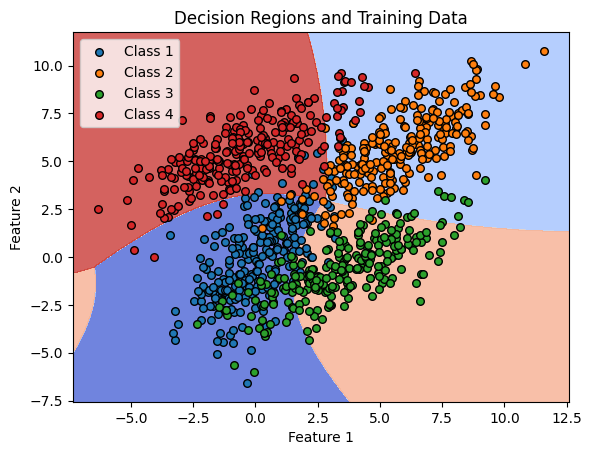

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:, :-1]  # First two columns as features
    y = data[:, -1].astype(int)  # Last column as labels (ensure integer type)
    return X, y

# Function to calculate the mean and diagonal covariance matrix for each class
def estimate_parameters(X, y, num_classes):
    means = np.zeros((num_classes, X.shape[1]))
    covariances = np.zeros((num_classes, X.shape[1]))  # Diagonal covariance matrix
    
    for c in range(1, num_classes + 1):  # Adjusting for class labels starting from 1
        class_data = X[y == c]
        means[c - 1] = np.mean(class_data, axis=0)
        covariances[c - 1] = np.var(class_data, axis=0) + 1e-6  # Adding small value for numerical stability
        
    return means, covariances

# Gaussian likelihood function (in log scale)
def gaussian_likelihood(X, mean, covariance):
    return -0.5 * np.sum(np.log(2 * np.pi * covariance)) - 0.5 * np.sum(((X - mean) ** 2) / covariance, axis=1)

# Bayes' classifier function (batch version for faster prediction on grid points)
def bayes_classifier_batch(X_train, y_train, X, num_classes):
    priors = np.array([np.mean(y_train == c) for c in range(1, num_classes + 1)])
    means, covariances = estimate_parameters(X_train, y_train, num_classes)

    # Compute log posteriors for each class in a vectorized manner
    log_posteriors = np.zeros((X.shape[0], num_classes))
    for c in range(num_classes):
        log_likelihood = gaussian_likelihood(X, means[c], covariances[c])
        log_posteriors[:, c] = np.log(priors[c]) + log_likelihood
    
    return np.argmax(log_posteriors, axis=1) + 1  # Adjust to match class labels 1, 2, 3, 4

# Decision Region Plot (optimized)
def plot_decision_regions(X_train, y_train, X_test, y_test, num_classes):
    # Set up a grid for the plot
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict class labels for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = bayes_classifier_batch(X_train, y_train, grid_points, num_classes)
    Z = Z.reshape(xx.shape)

    # Plotting decision regions
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # Scatter plot the training data
    for c in range(1, num_classes + 1):
        plt.scatter(X_train[y_train == c, 0], X_train[y_train == c, 1], 
                    label=f'Class {c}', edgecolor='black', s=30)
    
    
    plt.title('Decision Regions and Training Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_decision_regions(X_train, y_train, X_test, y_test, num_classes=4)


### Decision region plot for all the classes together with the testing data superimposed 

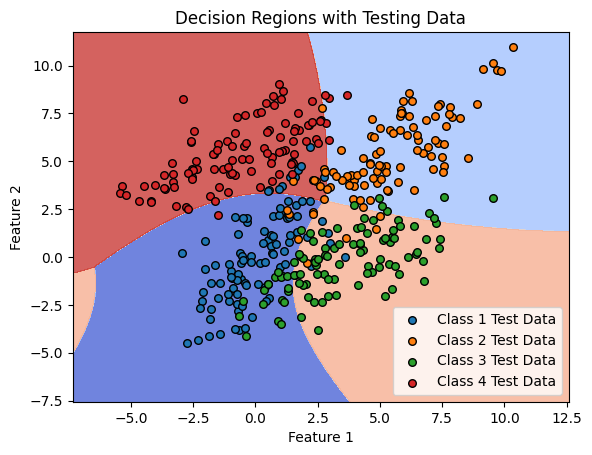

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:, :-1]  # First two columns as features
    y = data[:, -1].astype(int)  # Last column as labels (ensure integer type)
    return X, y

# Function to calculate the mean and diagonal covariance matrix for each class
def estimate_parameters(X, y, num_classes):
    means = np.zeros((num_classes, X.shape[1]))
    covariances = np.zeros((num_classes, X.shape[1]))  # Diagonal covariance matrix
    
    for c in range(1, num_classes + 1):  # Adjusting for class labels starting from 1
        class_data = X[y == c]
        means[c - 1] = np.mean(class_data, axis=0)
        covariances[c - 1] = np.var(class_data, axis=0) + 1e-6  # Adding small value for numerical stability
        
    return means, covariances

# Gaussian likelihood function (in log scale)
def gaussian_likelihood(X, mean, covariance):
    return -0.5 * np.sum(np.log(2 * np.pi * covariance)) - 0.5 * np.sum(((X - mean) ** 2) / covariance, axis=1)

# Bayes' classifier function (batch version for faster prediction on grid points)
def bayes_classifier_batch(X_train, y_train, X, num_classes):
    priors = np.array([np.mean(y_train == c) for c in range(1, num_classes + 1)])
    means, covariances = estimate_parameters(X_train, y_train, num_classes)

    # Compute log posteriors for each class in a vectorized manner
    log_posteriors = np.zeros((X.shape[0], num_classes))
    for c in range(num_classes):
        log_likelihood = gaussian_likelihood(X, means[c], covariances[c])
        log_posteriors[:, c] = np.log(priors[c]) + log_likelihood
    
    return np.argmax(log_posteriors, axis=1) + 1  # Adjust to match class labels 1, 2, 3, 4

# Decision Region Plot (optimized with test data overlay)
def plot_decision_regions_with_test(X_train, y_train, X_test, y_test, num_classes):
    # Set up a grid for the plot
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict class labels for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = bayes_classifier_batch(X_train, y_train, grid_points, num_classes)
    Z = Z.reshape(xx.shape)

    # Plotting decision regions
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # Scatter plot the test data
    for c in range(1, num_classes + 1):
        plt.scatter(X_test[y_test == c, 0], X_test[y_test == c, 1], 
                    label=f'Class {c} Test Data', edgecolor='black', s=30)
    
    plt.title('Decision Regions with Testing Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Plot decision regions with test data
plot_decision_regions_with_test(X_train, y_train, X_test, y_test, num_classes=4)


### Decision region plot for every pair of classes with the respective training data superimposed 

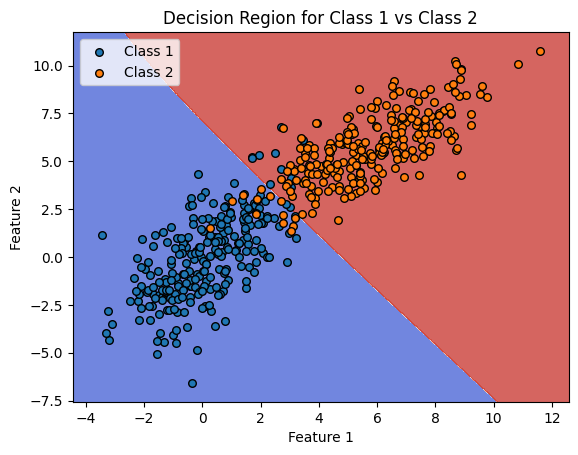

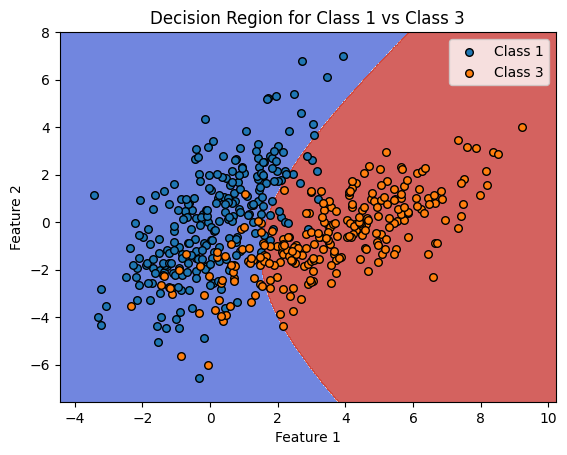

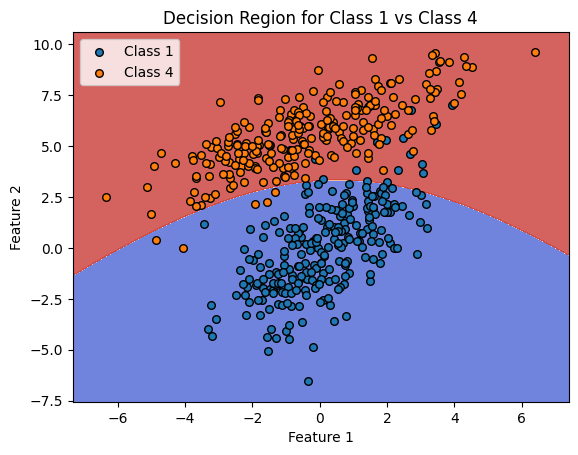

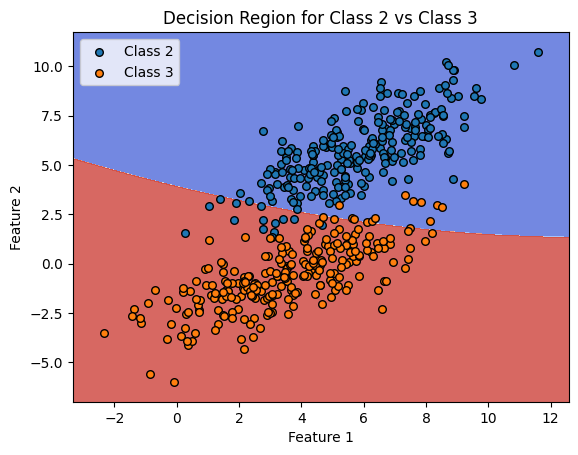

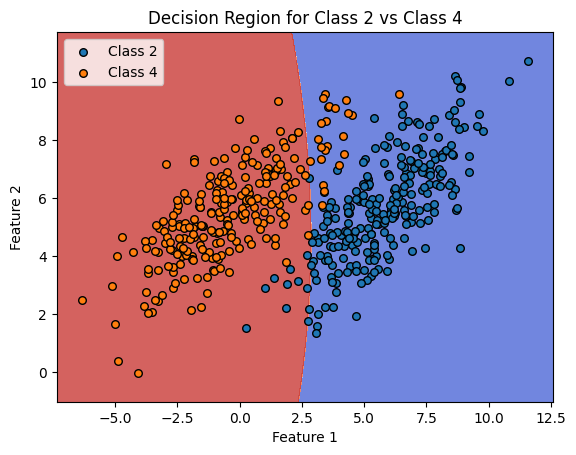

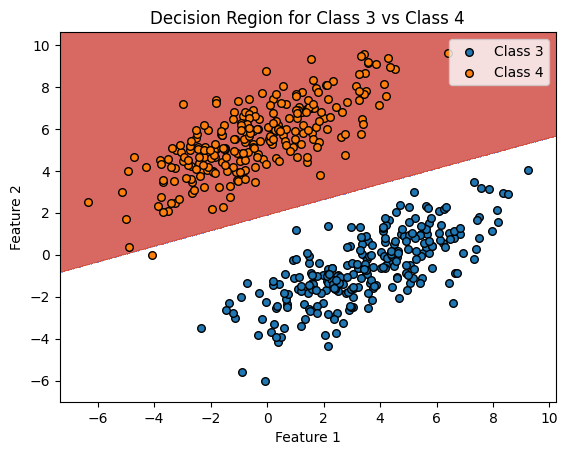

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Load datasets
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:, :-1]  # First two columns as features
    y = data[:, -1].astype(int)  # Last column as labels (ensure integer type)
    return X, y

# Function to calculate the mean and diagonal covariance matrix for each class
def estimate_parameters(X, y, classes):
    means = {}
    covariances = {}
    for c in classes:
        class_data = X[y == c]
        means[c] = np.mean(class_data, axis=0)
        covariances[c] = np.var(class_data, axis=0) + 1e-6  # Adding small value for numerical stability
    return means, covariances

# Gaussian likelihood function (in log scale)
def gaussian_likelihood(X, mean, covariance):
    return -0.5 * np.sum(np.log(2 * np.pi * covariance)) - 0.5 * np.sum(((X - mean) ** 2) / covariance, axis=1)

# Bayes' classifier function for two classes (for decision regions per class pair)
def bayes_classifier_two_classes(X, X_train, y_train, class1, class2):
    priors = {
        class1: np.mean(y_train == class1),
        class2: np.mean(y_train == class2)
    }
    means, covariances = estimate_parameters(X_train, y_train, [class1, class2])
    
    log_posteriors = np.zeros((X.shape[0], 2))
    for i, c in enumerate([class1, class2]):
        log_likelihood = gaussian_likelihood(X, means[c], covariances[c])
        log_posteriors[:, i] = np.log(priors[c]) + log_likelihood
    
    return np.where(log_posteriors[:, 0] > log_posteriors[:, 1], class1, class2)

# Decision Region Plot for every pair of classes
def plot_decision_regions_per_pair(X_train, y_train, num_classes):
    class_pairs = list(combinations(range(1, num_classes + 1), 2))  # Unique pairs of classes
    
    for class1, class2 in class_pairs:
        # Filter data for the current class pair
        mask = (y_train == class1) | (y_train == class2)
        X_pair = X_train[mask]
        y_pair = y_train[mask]

        # Set up a grid for the plot
        h = .02  # Step size in the mesh
        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Predict class labels for each point in the grid for the current pair
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = bayes_classifier_two_classes(grid_points, X_pair, y_pair, class1, class2)
        Z = Z.reshape(xx.shape)

        # Plotting decision regions
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        
        # Scatter plot the training data for the current pair of classes
        plt.scatter(X_pair[y_pair == class1, 0], X_pair[y_pair == class1, 1], label=f'Class {class1}', edgecolor='black', s=30)
        plt.scatter(X_pair[y_pair == class2, 0], X_pair[y_pair == class2, 1], label=f'Class {class2}', edgecolor='black', s=30)
        
        plt.title(f'Decision Region for Class {class1} vs Class {class2}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()


# Plot decision regions for each pair of classes
plot_decision_regions_per_pair(X_train, y_train, num_classes=4)


## Evaluation metrics
 
### Classification accuracy, precision for every class, mean precision, recall for every class, mean recall, F-measure for every class and mean F-measure on test data

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load datasets
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:, :-1]  # First two columns as features
    y = data[:, -1].astype(int)  # Last column as labels (ensure integer type)
    return X, y

# Function to calculate the mean and diagonal covariance matrix for each class
def estimate_parameters(X, y, num_classes):
    means = np.zeros((num_classes, X.shape[1]))
    covariances = np.zeros((num_classes, X.shape[1]))  # Diagonal covariance matrix
    
    for c in range(1, num_classes + 1):  # Adjusting for class labels starting from 1
        class_data = X[y == c]
        means[c - 1] = np.mean(class_data, axis=0)
        covariances[c - 1] = np.var(class_data, axis=0) + 1e-6  # Adding small value for numerical stability
        
    return means, covariances

# Gaussian likelihood function (in log scale)
def gaussian_likelihood(X, mean, covariance):
    return -0.5 * np.sum(np.log(2 * np.pi * covariance)) - 0.5 * np.sum(((X - mean) ** 2) / covariance, axis=1)

# Bayes' classifier function (batch version for faster prediction on test data)
def bayes_classifier_batch(X_train, y_train, X, num_classes):
    priors = np.array([np.mean(y_train == c) for c in range(1, num_classes + 1)])
    means, covariances = estimate_parameters(X_train, y_train, num_classes)

    # Compute log posteriors for each class in a vectorized manner
    log_posteriors = np.zeros((X.shape[0], num_classes))
    for c in range(num_classes):
        log_likelihood = gaussian_likelihood(X, means[c], covariances[c])
        log_posteriors[:, c] = np.log(priors[c]) + log_likelihood
    
    return np.argmax(log_posteriors, axis=1) + 1  # Adjust to match class labels 1, 2, 3, 4


# Predict on the test data
y_pred = bayes_classifier_batch(X_train, y_train, X_test, num_classes=4)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])
recall_per_class = recall_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])
f1_per_class = f1_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])

mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1 = np.mean(f1_per_class)

# Print metrics
print("Classification Accuracy:", accuracy)
for i, (prec, rec, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class), 1):
    print(f"Class {i} - Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)


Classification Accuracy: 0.825
Class 1 - Precision: 0.7619047619047619, Recall: 0.8, F1-score: 0.7804878048780488
Class 2 - Precision: 0.8645833333333334, Recall: 0.83, F1-score: 0.8469387755102041
Class 3 - Precision: 0.8588235294117647, Recall: 0.73, F1-score: 0.7891891891891892
Class 4 - Precision: 0.8245614035087719, Recall: 0.94, F1-score: 0.8785046728971962
Mean Precision: 0.827468257039658
Mean Recall: 0.825
Mean F1-score: 0.8237801106186595


### Confusion matrix based on the performance for test data

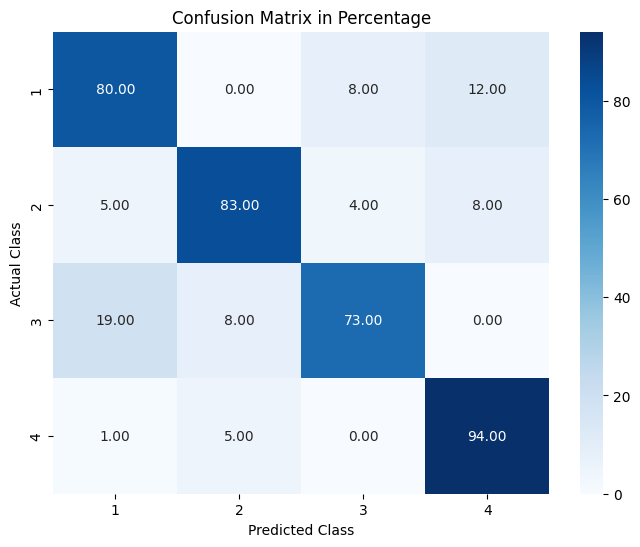

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = bayes_classifier_batch(X_train, y_train, X_test, num_classes=4)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4])

# Convert confusion matrix to percentage format
conf_matrix_percentage = (conf_matrix / conf_matrix.sum(axis=1, keepdims=True)) * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix in Percentage")
plt.show()
